# Seismic recording analysis from 20 gridded geophones at Holyrood Park
## Inverse Wave Equation Gradiometry applied to infer velocity information in the survey area

### Define path and load in packages

In [1]:
# Add filepath
import sys
sys.path.append('/home/s1837736')
import obspy
from obspy import *
import matplotlib.pyplot as plt
from obspy import read
from obspy.core import UTCDateTime
import numpy as np
import scipy
from scipy import signal
from obspy.core.util import *
from obspy.signal.util import *
from obspy.imaging.spectrogram import spectrogram
import obspy.core.stream as stream
from scipy import signal
from scipy.signal import detrend
from scipy.signal import sosfiltfilt, butter
import matplotlib.lines as lines
from matplotlib.pyplot import figure
import matplotlib.ticker as ticker
from sklearn import preprocessing
import pandas as pd
from itertools import combinations
from itertools import product
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from FCT_3D_gradients import dttv, _1st_DER, _2nd_DER, ROT_2nd_DER
from FCT_GRADIOMETRY_good_loop import *
from FCT_LinearRegression import *
import matplotlib.cm as cm
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
plt.rcParams.update({'font.size': 15})
path = "/home/s1837736/HR/*"

### Experiment Timestamps and Parameters (Holyrood)

In [2]:
# Chose which experiment you're on

spacing = 4             # Choice 4
repeat = 1              # Choice 1 or 2
roll =  3               # Number of Roll 
                        ## 1-5 Repeat 1 (1 row at a time)
                        ## 1-3 Repeat 1 (2 rows at a time)
source_type = 'ambient_15min_4'  # 'ambient' run' OR 'active' (16 shots)
geom = '4x5'            # 4x5

if repeat == 1:
    if roll==1:
        #Roll1
        list_rec = ['03713','05100','05014','04693','04915','04021','05143','04883','05034','04932',\
                    '03479','05190','04943','03574','03478','04812','04938','04457','03829','04651']
        if source_type == 'ambient':
            START_roll = UTCDateTime("2022-10-12T11:08:00.0")
            STOP_roll  = UTCDateTime("2022-10-12T11:25:00.0")
        elif source_type == 'active':  
            START_roll = UTCDateTime("2022-10-12T11:32:00.0")
            STOP_roll  = UTCDateTime("2022-10-12T11:35:00.0")
    if roll==2:
        #Roll2
        list_rec = ['04693','03713','05100','05014','04883','04915','04021','05143','05190','05034',\
                    '04932','03479','04812','04943','03574','03478','04651','04938','04457','03829']
        if source_type == 'ambient':
            START_roll= UTCDateTime("2022-10-12T11:43:00.0")
            STOP_roll = UTCDateTime("2022-10-12T11:59:00.0")
        elif source_type == 'active':                            
            START_roll = UTCDateTime("2022-10-12T12:04:00.0")
            STOP_roll  = UTCDateTime("2022-10-12T12:08:00.0")
            
    if roll==3:
        #Roll3
        list_rec = ['05014','04693','03713','05100','05143','04883','04915','04021','03479','05190',\
                    '05034','04932','03478','04812','04943','03574','03829','04651','04938','04457']
        if source_type == 'ambient_1h':
            START_roll= UTCDateTime("2022-10-12T12:16:00.0")
            STOP_roll = UTCDateTime("2022-10-12T13:16:00.0")
        if source_type == 'ambient_15min_1':
            START_roll = UTCDateTime("2022-10-12T12:16:00.0")
            STOP_roll  = UTCDateTime("2022-10-12T12:31:00.0")
        if source_type == 'ambient_15min_2':
            START_roll = UTCDateTime("2022-10-12T12:31:00.0")
            STOP_roll  = UTCDateTime("2022-10-12T12:46:00.0")
        if source_type == 'ambient_15min_3':
            START_roll = UTCDateTime("2022-10-12T12:46:00.0")
            STOP_roll  = UTCDateTime("2022-10-12T13:01:00.0")
        if source_type == 'ambient_15min_4':
            START_roll = UTCDateTime("2022-10-12T13:01:00.0")
            STOP_roll  = UTCDateTime("2022-10-12T13:16:00.0")
        elif source_type == 'active':                            
            START_roll = UTCDateTime("2022-10-12T13:28:00.0")
            STOP_roll  = UTCDateTime("2022-10-12T13:34:00.0")

    if roll==4:
        #Roll4
        list_rec = ['05100','05014','04693','03713','04021','05143','04883','04915','04932','03479',\
                    '05190','05034','03574','03478','04812','04943','04457','03829','04651','04938']
        if source_type == 'ambient':
            START_roll= UTCDateTime("2022-10-12T13:54:00.0")
            STOP_roll = UTCDateTime("2022-10-12T14:09:00.0")
        elif source_type == 'active':                            
            START_roll = UTCDateTime("2022-10-12T14:30:00.0")
            STOP_roll  = UTCDateTime("2022-10-12T14:35:00.0")
            
    if roll==5:
        #Roll5
        list_rec = ['03713','05100','05014','05693','04915','04021','05143','04883','05034','04932',\
                    '03479','05190','04943','03574','03478','04812','04938','04457','03829', '04651']
        if source_type == 'ambient':
            START_roll= UTCDateTime("2022-10-12T14:40:00.0")
            STOP_roll = UTCDateTime("2022-10-12T14:58:30.0")
        elif source_type == 'active':                            
            START_roll = UTCDateTime("2022-10-12T15:00:00.0")
            STOP_roll  = UTCDateTime("2022-10-12T15:05:00.0")
            
            
if repeat ==2:
    if roll==1:
        #Roll1
        list_rec = ['03713','05100','05014','04693','04915','04021','05143','04883','05034','04932',\
                    '03479','05190','04943','03574','03478','04812','04938','04457','03829','04651']
        if source_type == 'ambient':   
            START_roll = UTCDateTime("2022-10-12T15:21:00.0")
            STOP_roll  = UTCDateTime("2022-10-12T15:36:00.0")
        elif source_type == 'active':  
            START_roll = UTCDateTime("2022-10-12T15:41:00.0")
            STOP_roll  = UTCDateTime("2022-10-12T15:44:00.0") #ok
            
    if roll==2:
        #Roll2
        list_rec = ['05014','04693','03713','05100','05143','04883','04915','04021','03479','05190'\
                    '05034','04932','03478','04812','04943','03574','03829','04651','04938','04457']
        if source_type == 'ambient':
            START_roll= UTCDateTime("2022-10-12T15:51:00.0")
            STOP_roll = UTCDateTime("2022-10-12T16:06:00.0")
        elif source_type == 'active':                          
            START_roll = UTCDateTime("2022-10-12T16:06:00.0")
            STOP_roll  = UTCDateTime("2022-10-12T16:20:00.0") ##Check !!!! no notes
            
    if roll==3:
        #Roll2
        list_rec = ['03713','05100','05014','04693','04915','04021','05143','04883','05034','04932',\
                    '03479','05190','04943','03574','03478','04812','04938','04457','03829','04651']
        if source_type == 'ambient':
            START_roll= UTCDateTime("2022-10-12T16:23:00.0")
            STOP_roll = UTCDateTime("2022-10-12T16:43:00.0")
        elif source_type == 'active':                           
            START_roll = UTCDateTime("2022-10-12T16:44:00.0")
            STOP_roll  = UTCDateTime("2022-10-12T16:49:00.0") ##Check
            



### Create seismic trace from raw data

In [3]:
# Specify start 

t_start = START_roll
t_stop  =  STOP_roll
#t_start = UTCDateTime("2022-10-12T11:8:00.0")
#t_stop  = UTCDateTime("2022-10-12T11:25:00.0")

config =  read(path, starttime = t_start, endtime = t_stop)
b_end=int(STOP_roll-START_roll)

### Assign each seismic trace to its array position within grid

In [4]:
# Assign nodes to correct position within Array
N = len(config)

if geom == '4x5':
    for i in range(0,N):
        # Column 1
        if (config[i].stats.station== list_rec[0]):
            x0y0=i
            rec_x0y0 = config[x0y0]
        if(config[i].stats.station== list_rec[1]):
            x1y0=i
            rec_x1y0 = config[x1y0]
        if(config[i].stats.station== list_rec[2]):
            x2y0 = i
            rec_x2y0 = config[x2y0]
        if(config[i].stats.station== list_rec[3]):
            x3y0 = i
            rec_x3y0 = config[x3y0]


        # Column 2
        if (config[i].stats.station== list_rec[4]):
            x0y1=i
            rec_x0y1 = config[x0y1]
        if(config[i].stats.station== list_rec[5]):
            x1y1=i
            rec_x1y1 = config[x1y1]
        if(config[i].stats.station== list_rec[6]):
            x2y1 = i
            rec_x2y1 = config[x2y1]
        if(config[i].stats.station== list_rec[7]):
            x3y1 = i
            rec_x3y1 = config[x3y1]



        # Column 3
        if (config[i].stats.station== list_rec[8]):
            x0y2=i
            rec_x0y2 = config[x0y2]
        if(config[i].stats.station== list_rec[9]):
            x1y2=i
            rec_x1y2 = config[x1y2]
        if(config[i].stats.station== list_rec[10]):
            x2y2 = i
            rec_x2y2 = config[x2y2]
        if(config[i].stats.station== list_rec[11]):
            x3y2 = i
            rec_x3y2 = config[x3y2]



        # Column 4
        if (config[i].stats.station== list_rec[12]):
            x0y3=i
            rec_x0y3 = config[x0y3]
        if(config[i].stats.station== list_rec[13]):
            x1y3=i
            rec_x1y3 = config[x1y3]
        if(config[i].stats.station== list_rec[14]):
            x2y3 = i
            rec_x2y3 = config[x2y3]
        if(config[i].stats.station== list_rec[15]):
            x3y3 = i
            rec_x3y3 = config[x3y3]



        # Column 5
        if (config[i].stats.station== list_rec[16]):
            x0y4=i
            rec_x0y4 = config[x0y4]
        if(config[i].stats.station== list_rec[17]):
            x1y4=i
            rec_x1y4 = config[x1y4]
        if(config[i].stats.station== list_rec[18]):
            x2y4 = i
            rec_x2y4 = config[x2y4]
        if(config[i].stats.station== list_rec[19]):
            x3y4 = i
            rec_x3y4 = config[x3y4]
    
    #create an array of seismic traces
        
    VEL_CONFIG = np.array([[rec_x0y4.data,rec_x0y3.data,rec_x0y2.data,rec_x0y1.data,rec_x0y0.data],[rec_x1y4.data,rec_x1y3.data,rec_x1y2.data,rec_x1y1.data,rec_x1y0.data],\
    [rec_x2y4.data,rec_x2y3.data,rec_x2y2.data,rec_x2y1.data,rec_x2y0.data],[rec_x3y4.data,rec_x3y3.data,rec_x3y2.data,rec_x3y1.data,rec_x3y0.data]])
 
    VEL_CONFIG_names = np.array([[rec_x0y4.stats.station,rec_x0y3.stats.station,rec_x0y2.stats.station,rec_x0y1.stats.station,rec_x0y0.stats.station],[rec_x1y4.stats.station,rec_x1y3.stats.station,rec_x1y2.stats.station,rec_x1y1.stats.station,rec_x1y0.stats.station],\
    [rec_x2y4.stats.station,rec_x2y3.stats.station,rec_x2y2.stats.station,rec_x2y1.stats.station,rec_x2y0.stats.station],[rec_x3y4.stats.station,rec_x3y3.stats.station,rec_x3y2.stats.station,rec_x3y1.stats.station,rec_x3y0.stats.station]])

### Plot each seismic trace in correct position

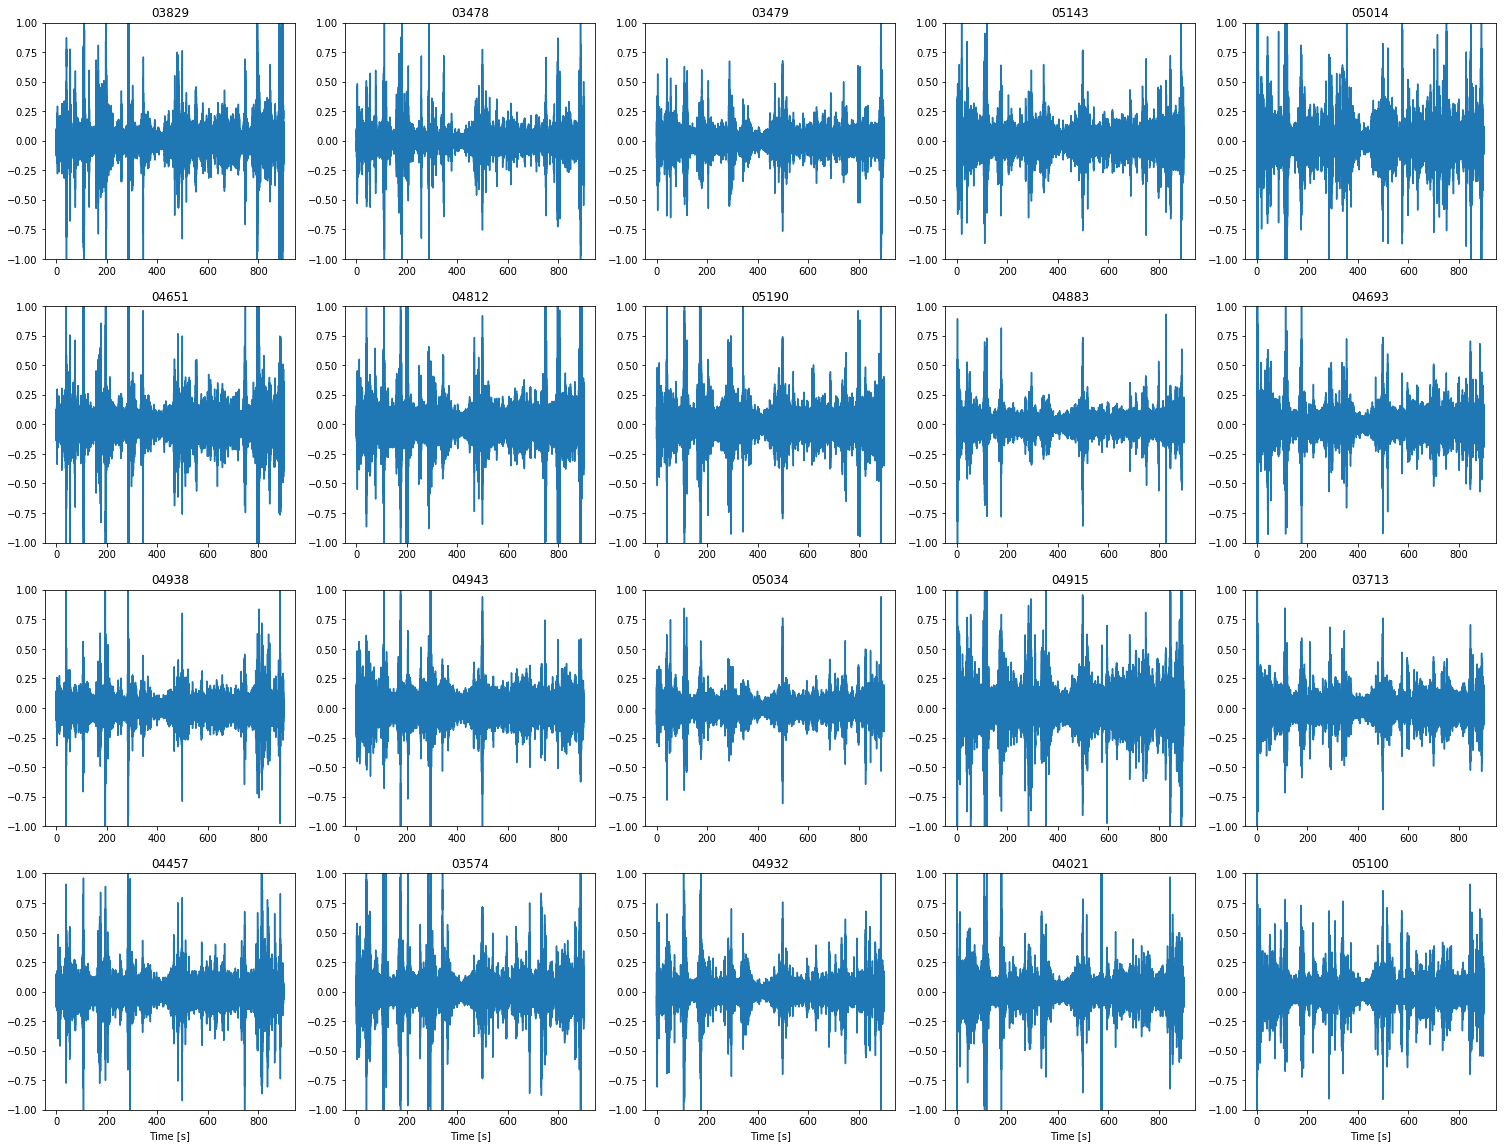

In [5]:
t_steps = int(config[0].stats.npts)
dt=config[0].stats.delta
t = np.linspace(0,t_steps*dt, t_steps)

if geom=='4x5':
    fig, axs =  plt.subplots(figsize=(26,20),nrows=4,ncols=5)
    axs[0,0].set_title(rec_x0y4.stats.station)
    axs[0,0].plot(t,rec_x0y4.data)
    axs[0,1].set_title(rec_x0y3.stats.station)
    axs[0,1].plot(t,rec_x0y3.data)
    axs[0,2].set_title(rec_x0y2.stats.station)
    axs[0,2].plot(t,rec_x0y2.data)
    axs[0,3].set_title(rec_x0y1.stats.station)
    axs[0,3].plot(t,rec_x0y1.data)
    axs[0,4].set_title(rec_x0y0.stats.station)
    axs[0,4].plot(t,rec_x0y0.data)

    axs[1,0].set_title(rec_x1y4.stats.station)
    axs[1,0].plot(t,rec_x1y4.data)
    axs[1,1].set_title(rec_x1y3.stats.station)
    axs[1,1].plot(t,rec_x1y3.data)
    axs[1,2].set_title(rec_x1y2.stats.station)
    axs[1,2].plot(t,rec_x1y2.data)
    axs[1,3].set_title(rec_x1y1.stats.station)
    axs[1,3].plot(t,rec_x1y1.data)
    axs[1,4].set_title(rec_x1y0.stats.station)
    axs[1,4].plot(t,rec_x1y0.data)

    axs[2,0].set_title(rec_x2y4.stats.station)
    axs[2,0].plot(t,rec_x2y4.data)
    axs[2,1].set_title(rec_x2y3.stats.station)
    axs[2,1].plot(t,rec_x2y3.data)
    axs[2,2].set_title(rec_x2y2.stats.station)
    axs[2,2].plot(t,rec_x2y2.data)
    axs[2,3].set_title(rec_x2y1.stats.station)
    axs[2,3].plot(t,rec_x2y1.data)
    axs[2,4].set_title(rec_x2y0.stats.station)
    axs[2,4].plot(t,rec_x2y0.data)

    axs[3,0].set_title(rec_x3y4.stats.station)
    axs[3,0].plot(t,rec_x3y4.data)
    axs[3,1].set_title(rec_x3y3.stats.station)
    axs[3,1].plot(t,rec_x3y3.data)
    axs[3,2].set_title(rec_x3y2.stats.station)
    axs[3,2].plot(t,rec_x3y2.data)
    axs[3,3].set_title(rec_x3y1.stats.station)
    axs[3,3].plot(t,rec_x3y1.data)
    axs[3,4].set_title(rec_x3y0.stats.station)
    axs[3,4].plot(t,rec_x3y0.data)
    
    axs[3,4].set_xlabel('Time [s]')
    axs[3,3].set_xlabel('Time [s]')
    axs[3,2].set_xlabel('Time [s]')
    axs[3,1].set_xlabel('Time [s]')
    axs[3,0].set_xlabel('Time [s]')
    
    for kk in range(0,4):
        for ll in range(0,5):
            axs[kk,ll].set_ylim(-1,1)

# Frequency Filter

In [5]:
dictionary={}
signalstore={}
dt=config[0].stats.delta
t_steps = int(config[0].stats.npts)

filtered = 'yes'

t = np.linspace(0,t_steps*dt, t_steps)

### Seismic cross-correlation test for frequency band

In [6]:
#freq=([3,3.5],[3.5,4], [4,5], [10,11],[3,4])([0.1,1],[1,2],
#for n,m in freq:   
##define frequencies
if filtered =='yes':
    # Bandbass Filter
    n=3.5
    m=4.5
    nn = np.array([n])
    mm = np.array([m])
    f_BAND = np.array([nn,mm])

sos=np.array(signal.butter(6,[f_BAND[0], f_BAND[1]], 'bandpass', fs=1/dt, output='sos' ))
yfilt=np.zeros(VEL_CONFIG.shape)
for i in range(4):
    for j in range(5):
        yfilt[i,j]=sosfiltfilt(sos,VEL_CONFIG[i,j])
## define timeslice
a_time=0
b_time=b_end
a=4000*a_time
b=4000*b_time #4000*seconds
tcut=np.asarray(t[a:b])
## define section and normalise
yfiltcut=np.zeros((4,5,b-a))
normfilt=np.zeros((4,5,b-a))
for i in range(4):
    for j in range(5):
        yfiltcut[i,j]=np.asarray(yfilt[i,j].data[a:b])
        normfilt[i,j]=signal.detrend(data=yfiltcut[i,j],type="constant")        

## define interval and empty arrays
interval = 3  ## in [s] gives length of trace segment you want to look at
percentage=10 ##percentage of interval for rolling interval move along
st0=0
st1=st0         # start at 0 s

crosses=list(product(np.arange(0,4,1),np.arange(0,5,1)))
crosscomb=combinations(crosses,2)
all_comb=np.array(list(crosscomb))

corr_test = np.zeros((len(all_comb),(t[-1]/(interval*percentage/100)).astype(int),2,2))   # gives you correlation indexes between receivers : 1 high correlation, 0 no correlation
tt1_window = np.zeros((((t[-1]-interval)/(interval*percentage/100)).astype(int)))      # stores start of time window intervals
tt2_window = np.zeros((((t[-1]-interval)/(interval*percentage/100)).astype(int)))      # stores end of time window intervals 
step1_window = np.zeros((((t[-1]-interval)/(interval*percentage/100)).astype(int))).astype(int) # data point of start of time window
step2_window = np.zeros((((t[-1]-interval)/(interval*percentage/100)).astype(int))).astype(int) # data point of end of time window
steps=int((((t[-1]-t[0])-interval)/(interval*percentage/100)))
index=np.zeros((steps))
coherency_time=np.zeros((steps,2))
coherency_values=np.zeros((steps))
#coherency_min=np.zeros((steps))
#coherency_max=np.zeros((steps))

for ii in range(0,((t[-1]-interval)/(interval*percentage/100)).astype(int)):
    tt1_window[ii] = st1
    tt2_window[ii] = st1+interval
    step1_window[ii] = int(tt1_window[ii]/dt)
    step2_window[ii] = int(tt2_window[ii]/dt)
    st1=st1+(interval*percentage/100)

    for j in range(len(all_comb)):

        first=all_comb[j][0]
        second=all_comb[j][1]
        corr_test[j,ii] = np.corrcoef(normfilt[first[0],first[1],(step1_window[ii]):(step2_window[ii])], normfilt[second[0],second[1],int(step1_window[ii]):int(step2_window[ii])])
    coherency_time[ii] = (tt1_window[ii]),corr_test[:,ii].mean(axis=0)[0,1]
    coherency_values[ii]=corr_test[:,ii].mean(axis=0)[0,1]

    index[ii]=int(tt1_window[ii])
    new_freq=(str(n) + "-" +str(m))
    
dictionary[str(new_freq +" mean")]=coherency_values
signalstore[str(new_freq +" mean")]=normfilt[2,2]

### Identify timestamps with high cross-correlation

In [29]:
c_threshold=0.2
window_seconds=10
t_threshold=((window_seconds/(interval*percentage/100))-(1/(percentage/100)))

ti=coherency_time[:,0]
co=coherency_time[:,1]

bool=co<c_threshold

fullstore=[]
store=[]
for i in range(len(co)-1):
    if bool[i]==1:
        var=bool[i]

        if bool[i+1]==var:
            store.append([i,ti[i]])
        else:
            fullstore.append(store)
            store=[]

consec=[]  
storewin=[]
for i in range(len(fullstore)-1):
    consec.append(len(fullstore[i]))
    if len(fullstore[i])>t_threshold:
        storewin.append(fullstore[i])
consec=np.array(consec)
consec[consec>t_threshold]     
coherency_start=[]
coherency_stop=[]

coherency_win=np.zeros((len(storewin),2))
for i in range(len(storewin)):
    print(storewin[i][1][1]-(interval*percentage/100),'-',storewin[i][-1][1]+(interval*percentage/100))a

6.9 - 19.5
35.4 - 46.5
166.2 - 177.6
281.4 - 290.1
336.6 - 348.9
353.4 - 363.6
822.9 - 831.6


# Inverse Wave Equation Gradiomtery
### Perform gradiometry on selected timestamps of processed seismic data

In [8]:
velocities={}
CoR={} # dictionary of phase velocities and dictionary of the coefficient of the determination for each position within the array

In [11]:
order=2
dist_r = spacing
nf = 0
xx=1
yy=2
f_filt_cent=[((m-n)/2)+n]
for k in range(len(coherency_win)):
    start_t=coherency_win[k][0]
    stop_t=coherency_win[k][1]
    start_g=int(start_t/dt)
    stop_g=int(stop_t/dt)

    yfiltcut=np.zeros((4,5,stop_g-start_g))
    normfilt=np.zeros((4,5,stop_g-start_g))

    for i in range(4):
        for j in range(5):
            yfiltcut[i,j]=np.asarray(yfilt[i,j].data[start_g:stop_g])
            normfilt[i,j]=signal.detrend(data=yfiltcut[i,j],type="constant")
    t_steps=int(stop_g-start_g)
    
    configshape=VEL_CONFIG[:,:,start_g:stop_g]
    gradfilt = np.reshape(normfilt,(configshape.shape))

    ###################
    #GRADIOMETRY - CONSTANT DENSITY
    ###################

    gradfilt = np.reshape(gradfilt,(configshape.shape[0],configshape.shape[1],configshape.shape[2],1))
        # time we look at for grad
    
    t1= 0 
    t2= gradfilt.shape[2] 
    t_steps2 = t2-t1
    U_LAPLACE_CST, Utt_LAPLACE_CST, prodd , Dxx_CST = GRAD_LAPLACE_CST(dist_r, gradfilt[:,:,t1:t2,:], t_steps2, configshape.shape[0],configshape.shape[1], dt, order, f_filt_cent)

    m_CST = np.zeros((configshape.shape[0],configshape.shape[1]))
    r_sq_CST = np.zeros((configshape.shape[0],configshape.shape[1]))
    vel=np.zeros((2,3))   
    rsq=np.zeros((2,3))  
    for gg in range(1,configshape.shape[0]-1):
        for vv in range(1,configshape.shape[1]-1):
            model_CST = LinearRegression(fit_intercept=True)
            model_CST.fit(U_LAPLACE_CST[gg,vv,1:-1].reshape(-1, 1), Utt_LAPLACE_CST[gg,vv,1:-1].reshape(-1, 1))
            m_CST[gg,vv] = model_CST.coef_
            r_sq_CST[gg,vv] = model_CST.score(U_LAPLACE_CST[gg,vv,1:-1].reshape(-1, 1), Utt_LAPLACE_CST[gg,vv,1:-1].reshape(-1, 1))
            r_sq_CST[gg,vv] = np.round(r_sq_CST[gg,vv],6) # Coefficient of determination
            vel[gg-1,vv-1]=np.sqrt(np.abs(m_CST[gg,vv]))
            rsq[gg-1,vv-1]=r_sq_CST[gg,vv]
    CoR[k]=rsq
    velocities[k]=vel

### Perform linear regression on processed seismic data to identify phase velocity over the array

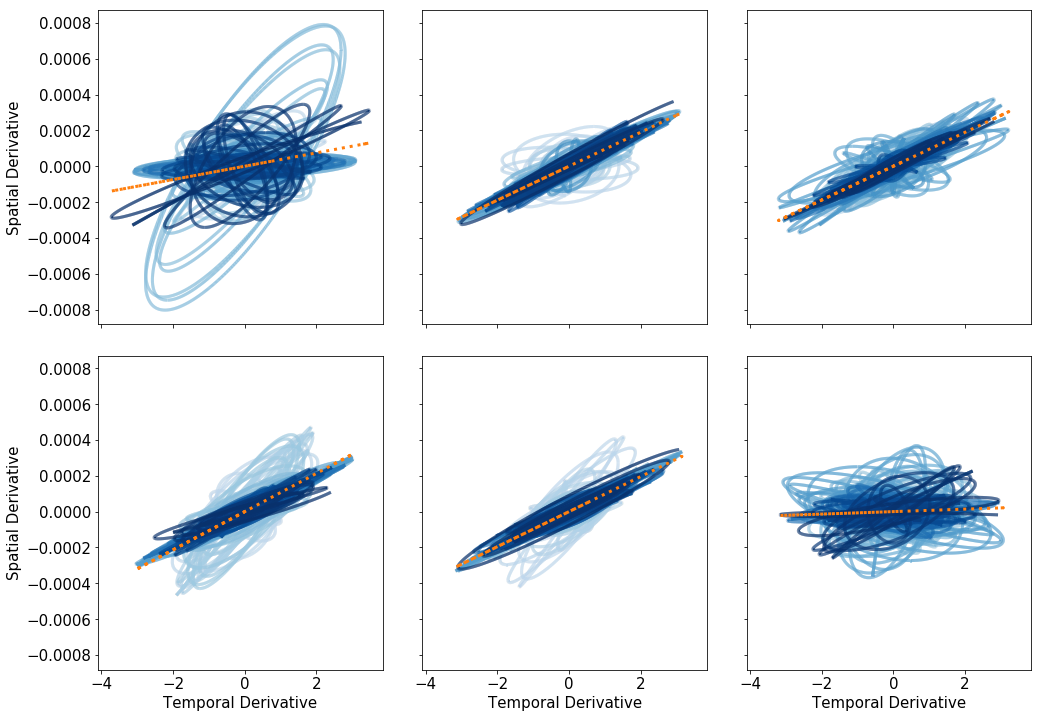

In [356]:
fig,ax=plt.subplots(figsize=(14,10),nrows=2, ncols=3, sharex=True, sharey=True)
plt.tight_layout()
for gg in range(1,configshape.shape[0]-1):
    for vv in range(1,configshape.shape[1]-1):
        model_CST = LinearRegression(fit_intercept=True)
        model_CST.fit(Utt_LAPLACE_CST[gg,vv,1:-1].reshape(-1, 1), U_LAPLACE_CST[gg,vv,1:-1].reshape(-1, 1))
        m_CST[gg,vv] = model_CST.coef_
        r_sq_CST[gg,vv] = model_CST.score(Utt_LAPLACE_CST[gg,vv,1:-1].reshape(-1, 1), U_LAPLACE_CST[gg,vv,1:-1].reshape(-1, 1))
        r_sq_CST[gg,vv] = np.round(r_sq_CST[gg,vv],6) # Coefficient of determination
        #fig, ax = plt.subplots(figsize=(4,4),ncols=1)
        Blues = cm.get_cmap('Blues', 512)
        newcmp = ListedColormap(Blues(np.linspace(0.25, 1, 256)))
        points = np.array([Utt_LAPLACE_CST[gg,vv,1:-1], U_LAPLACE_CST[gg,vv,1:-1]]).T.reshape(-1,1,2) 
        segments = np.concatenate([points[:-1], points[1:]], axis=1)   
        lc = LineCollection(segments, cmap=newcmp, linewidth=3) 
        lc.set_array(np.linspace(0,len(Utt_LAPLACE_CST[gg,vv,1:-1]),len(Utt_LAPLACE_CST[gg,vv,1:-1])))

        ax[gg-1,vv-1].add_collection(lc) 
        ax[gg-1,vv-1].autoscale()                               
        #cbar = fig.colorbar(lc, ticks=[0, len((U_LAPLACE_CST[gg,vv,1:-1]))/2, len((U_LAPLACE_CST[gg,vv,1:-1]))], label='Time [s]')
        #cbar.ax.set_yticklabels([str(start_t), str(stop_t-((stop_t-start_t)/2)), str(stop_t)])  

        ax[gg-1,vv-1].plot(Utt_LAPLACE_CST[gg,vv,1:-1].reshape(-1, 1), m_CST[gg,vv] * Utt_LAPLACE_CST[gg,vv,1:-1].reshape(-1, 1), c='tab:orange', linewidth=3, linestyle=':',label=f'$R^{2}$ = {np.round(r_sq_CST,4)}')
        #ax[gg-1,vv-1].set_xlim([-0.002,0.002])
        #ax[gg-1,vv-1].set_xticklabels(rotation=45, ha="right")
#ax[0,1].set_title("Linear regression at node "+ str(gg)+","+str(vv))
#ax[0,1].set_title("Linear regression plots)
ax[1,0].set_xlabel("Temporal Derivative")
ax[1,1].set_xlabel("Temporal Derivative")
ax[1,2].set_xlabel("Temporal Derivative")
ax[0,0].set_ylabel("Spatial Derivative")
ax[1,0].set_ylabel("Spatial Derivative")
#plt.savefig(f'/scratch/s1837736/3HZ high LR',bbox_inches='tight', dpi=100)

### Create plots of phase velocity and coefficient of determination variation over the array

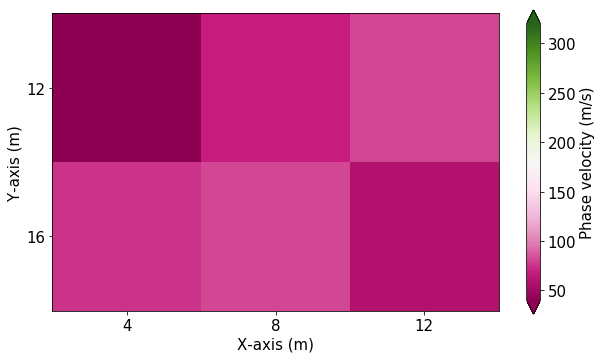

In [32]:
plt.figure(figsize=(10,8))
scale = cm.get_cmap('PiYG', 512)
scale = ListedColormap(scale(np.linspace(0, 1, 256)))
plt.imshow(vels, vmin=40, vmax=320, cmap=scale)
plt.colorbar(label='Phase velocity (m/s)',shrink=0.7, extend='both')
plt.xticks((0,1,2), (4,8,12))
plt.yticks((0,1), (12,16)) 
plt.xlabel('X-axis (m)')
plt.ylabel('Y-axis (m)')
#plt.savefig(f'/scratch/s1837736/3HZ high pvm 4',bbox_inches='tight', dpi=100)

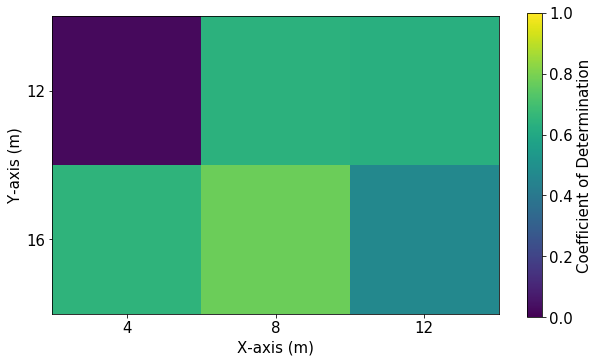

In [33]:
plt.figure(figsize=(10,8))
plt.imshow(mcor, origin = 'upper', vmin=0, vmax=1)
plt.xticks((0,1,2), (4,8,12))
plt.yticks((0,1), (12,16))   
plt.xlabel('X-axis (m)')
plt.ylabel('Y-axis (m)')
plt.colorbar(label='Coefficient of Determination',shrink=0.7)
#plt.savefig(f'/scratch/s1837736/3HZ high cor 4',bbox_inches='tight', dpi=100)